In [12]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"

In [2]:
from imutils import face_utils
import numpy as np
import imutils, dlib, cv2, csv
import matplotlib.pyplot as plt
import pandas as pd

사람 얼굴에 랜드마크 68개 찍어내기

In [2]:
def show_raw_detection(image, detector, predictor):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    rects = detector(gray, 1)                     # detector는 관련 모델을 뜻하는 듯하다
                                                  # ex) dogHeadDetector.dat
    for i, rect in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        for (x, y) in shape:
            cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
            
    cv2.imshow('Output', image)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [18]:
def show_raw_detection_plt(image, detector, predictor):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    dets = detector(img, upsample_num_times = 1)
    img_result = img.copy()
    
    for d in dets:
        x1, y1 = d.rect.left(), d.rect.top()
        x2, y2 = d.rect.right(), d.rect.bottom()
        
        cv2.rectangle(img_result, (x1, y1), (x2, y2), (255, 0, 0), 2, cv2.LINE_AA)
        
    shapes = []
    
    for i, d in enumerate(dets):
        shape = predictor(img, d.rect)
        shape = face_utils.shape_to_np(shape)
        
        for i, p in enumerate(shape):
            shapes.append(shape)
            
            cv2.circle(img_result, p, 3, (0, 0, 255), -1, cv2.LINE_AA)
            cv2.putText(img_result, str(i), tuple(p), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                       (255, 255, 255), 1, cv2.LINE_AA)
        
    plt.figure(figsize = (16, 16))
    plt.imshow(img_result)

In [83]:
def landmark_fix(landmarks):

    re_land = landmarks.copy()

    for i, j, k in zip(range(1, 7), [60, 60, 59, 59, 58, 58], range(18, 1, -3)):
        re_land[i] = (landmarks[j] - landmarks[i]) / k + landmarks[i]

    for i, j, k in zip([7, 8, 9], [57, 57, 57], [2, 2, 2]):
        re_land[i] = (landmarks[j] - landmarks[i]) / k + landmarks[i]

    for i, j, k in zip(range(15, 9, -1), [54, 54, 55, 55, 56, 56], range(18, 1, -3)):
        re_land[i] = (landmarks[j] - landmarks[i]) / k + landmarks[i]

In [9]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

image = cv2.imread('./img/01.png')
image = imutils.resize(image, width=500) 
show_raw_detection(image, detector, predictor)

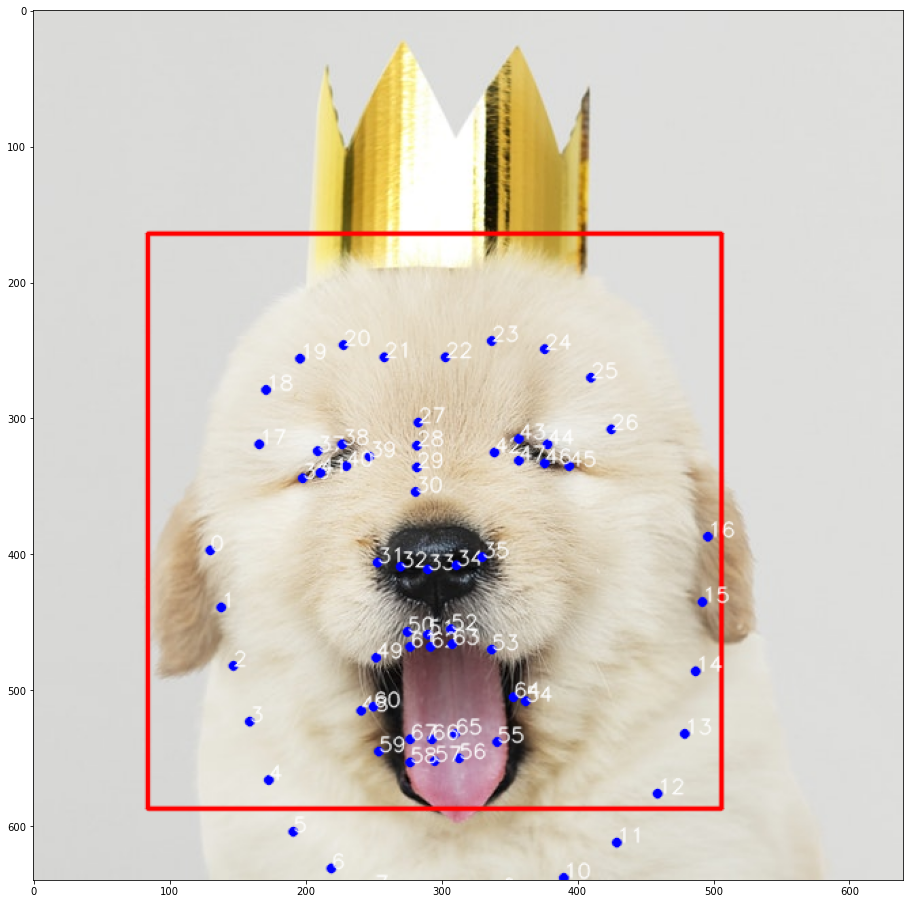

In [21]:
detector = dlib.cnn_face_detection_model_v1('dogHeadDetector.dat')
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
image = cv2.imread('./img/12.jpg')

show_raw_detection_plt(image, detector, predictor)

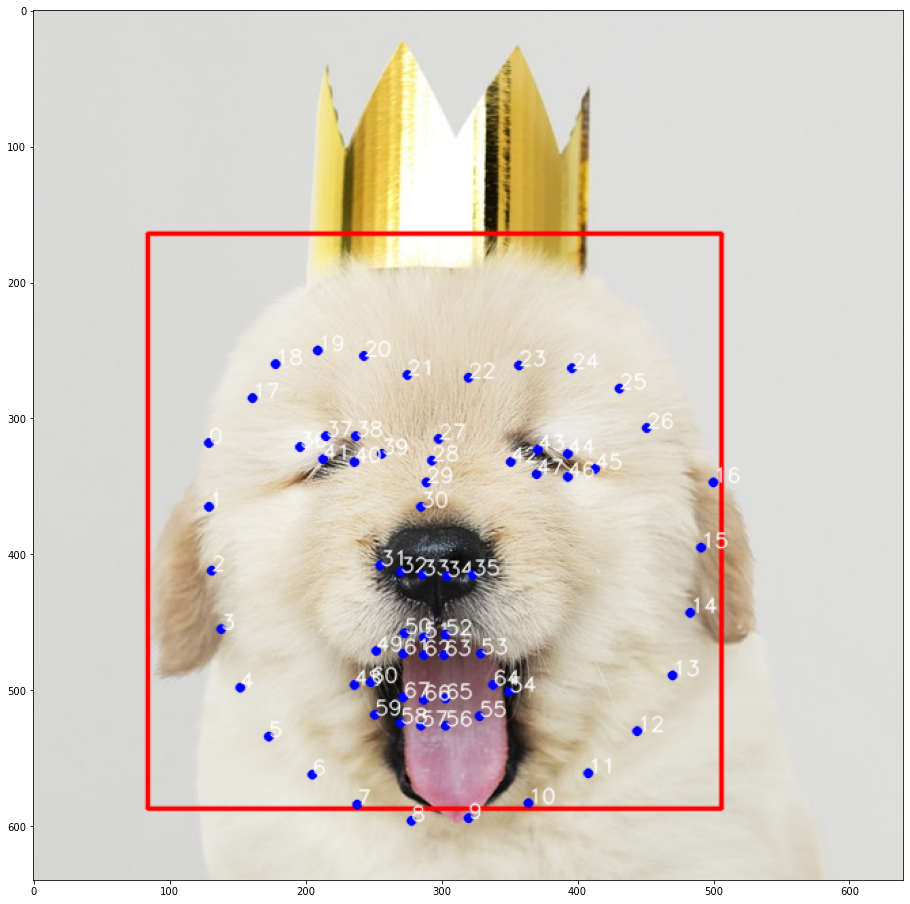

In [24]:
detector = dlib.cnn_face_detection_model_v1('dogHeadDetector.dat')
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks_GTX.dat')
img = cv2.imread('./img/12.jpg')

show_raw_detection_plt(img, detector, predictor)

<span style = 'color:blue'>1. csv 파일 저장하기</span>

In [56]:
detector = dlib.cnn_face_detection_model_v1('dogHeadDetector.dat')
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks_GTX.dat')

img_path = './dog/flickr_dog_000005.jpg'



img = cv2.imread(img_path)

if img is None:
    print('image read failed')
    sys.exit()
    
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
dets = detector(img, upsample_num_times = 1)

img_result = img.copy()

for i, d in enumerate(dets):
    print('Detection {}: Left: {}, Top: {}, Right: {}, Bottom: {}, Confidence: {}'.format(
    i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))
    
    x1, y1 = d.rect.left(), d.rect.top()
    x2, y2 = d.rect.right(), d.rect.bottom()         # 얼굴 좌표 저장
    
    cv2.rectangle(img_result, (x1, y1), (x2, y2), (255, 0, 0), 2, cv2.LINE_AA)
    
shapes = []
point = []

for i, d in enumerate(dets):
    shape = predictor(img, d.rect)
    shape = face_utils.shape_to_np(shape)
    
    for i, p in enumerate(shape):
        shapes.append(shape)
        cv2.circle(img_result, p, 3, (0, 0, 255), -1, cv2.LINE_AA)
        cv2.putText(img_result, str(i), tuple(p), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                   (255, 255, 255), 1, cv2.LINE_AA)
        
        
        # 좌표 뽑아오기
        p = p.astype('int')
        
#     print(p)
#     print(type(p))
#     print(p.dtype)
        point.extend(p)
    print(point)
    print(len(point))
        
        
        # csv 파일로 저장하기
    with open('test_15.csv', 'w', newline = '') as file:
        write = csv.writer(file)
        
        write.writerow(point)
        
        
# img_out = cv2.cvtColor(img_result, cv2.COLOR_RGB2BGR)

# plt.figure(figsize = (16, 16)), plt.axis('off')
# plt.imshow(img_result)

Detection 0: Left: 51, Top: 128, Right: 404, Bottom: 480, Confidence: 1.0308725833892822
[50, 235, 47, 286, 47, 336, 52, 385, 76, 429, 113, 465, 157, 496, 204, 517, 250, 521, 288, 511, 315, 480, 341, 445, 364, 405, 380, 364, 389, 324, 393, 283, 393, 243, 113, 217, 142, 196, 181, 189, 219, 194, 254, 208, 303, 218, 328, 204, 354, 196, 380, 198, 392, 217, 274, 259, 277, 291, 281, 324, 285, 357, 233, 371, 254, 376, 274, 382, 292, 376, 308, 368, 151, 259, 173, 254, 195, 255, 215, 265, 194, 271, 171, 269, 301, 264, 321, 253, 341, 253, 357, 257, 342, 268, 322, 269, 186, 418, 224, 415, 253, 412, 271, 416, 286, 412, 304, 416, 319, 419, 300, 438, 282, 448, 265, 450, 245, 448, 218, 439, 198, 420, 251, 428, 270, 430, 285, 428, 308, 422, 282, 426, 266, 428, 247, 426]
136


<span style = 'color:blue'>2. csv 파일을 불러와서 2차원 배열로 변경</span>

In [80]:
pd_frame = pd.read_csv('test_12.csv', sep = ',', header = None)
# print(pd_frame)

landmarks = (pd_frame.values).reshape((-1, 2))
print(landmarks[1:7])
# print(landmarks.shape)
# print(landmarks.dtype)

[[129 365]
 [131 412]
 [138 455]
 [152 498]
 [173 534]
 [205 562]]


In [27]:
re_land = landmarks.copy()

re_land[1] = ( landmarks[60] - landmarks[1]) / 10 + landmarks[1]
print(landmarks[1])
print(landmarks[60])
print(re_land[1])

img = cv2.imread('./dog/flickr_dog_000005.jpg')

cv2.namedWindow('image')

cv2.circle(img, re_land[1], 3, (0, 0, 255), -1, cv2.LINE_AA)

cv2.imshow('image', img)

cv2.waitKey()
cv2.destroyAllWindows()

[129 365]
[248 494]
[140 377]


In [76]:
for i in range(15, 9, -1):
    print(i)

15
14
13
12
11
10


<span style = 'color:blue'>3. 2차원 배열 요소 수정 - (8번이 턱의 중심 : 8번을 기준으로 좌,우 8개의 점, 57번이 입술의 중심)</span>

In [81]:
re_land = landmarks.copy()

for i, j, k in zip(range(1, 7), [60, 60, 59, 59, 58, 58], range(18, 1, -3)):
    re_land[i] = (landmarks[j] - landmarks[i]) / k + landmarks[i]
    
for i, j, k in zip([7, 8, 9], [57, 57, 57], [2, 2, 2]):
    re_land[i] = (landmarks[j] - landmarks[i]) / k + landmarks[i]

for i, j, k in zip(range(15, 9, -1), [54, 54, 55, 55, 56, 56], range(18, 1, -3)):
    re_land[i] = (landmarks[j] - landmarks[i]) / k + landmarks[i]

1
2
3
4
5
6
7
8
9
15
14
13
12
11
10


<span style = 'color:blue'>4. 사진 확인</span>

In [82]:
img = cv2.imread('./img/12.jpg')
img_co = img.copy()

for i in re_land:
    cv2.circle(img_co, i, 3, (0, 255, 0), -1, cv2.LINE_AA)
    
for j in landmarks:
    cv2.circle(img, j, 3, (0, 255, 0), -1, cv2.LINE_AA)
    
cv2.imshow('image', img)
cv2.imshow('image_re', img_co)

cv2.waitKey()
cv2.destroyAllWindows()

2차원 배열에서 행 삭제

In [50]:
landmarks = np.delete(landmarks, (2, 3), 0)
landmarks

SystemError: <built-in function destroyAllWindows> returned NULL without setting an error

------

In [46]:
a = np.array([0, 0])
b = np.array([2, 2])

c = (a + b) / 10
print(c); print()

d = (a + b) / 1.1
print(d)

[0.2 0.2]

[1.81818182 1.81818182]


In [20]:
import glob

filename = glob.glob('./img/*.jpg')

# f = filename.split('.')
print(filename)

# print(f'%' % f)

# print('{}'.format(filename[1]))

['./img\\05.jpg', './img\\06.jpg', './img\\07.jpg', './img\\08.jpg', './img\\10.jpg', './img\\11.jpg', './img\\12.jpg', './img\\13.jpg', './img\\14.jpg', './img\\15.jpg', './img\\20190613_23f7500e8e4843ec143bf4ba186e91ea.jpg', './img\\cj.jpg', './img\\flickr_dog_000063.jpg', './img\\smail.jpg', './img\\SSI_20140619184822_V.jpg']


<span style = 'color:red'> 턱의 중심 = 8, 입술의 중심 = 57, 눈썹의 피크점 = 19, 24</span>

In [84]:
img = cv2.imread('./img/01.png')

print(img)

[[[226 210 200]
  [238 237 233]
  [239 236 232]
  ...
  [238 236 230]
  [239 237 230]
  [238 236 230]]

 [[226 210 201]
  [238 237 232]
  [238 238 232]
  ...
  [237 236 231]
  [237 236 230]
  [237 236 229]]

 [[226 210 201]
  [238 237 233]
  [237 237 231]
  ...
  [238 235 230]
  [237 235 230]
  [238 236 230]]

 ...

 [[242 229 220]
  [238 235 232]
  [238 236 230]
  ...
  [ 98 120 145]
  [ 87 111 138]
  [113 135 158]]

 [[242 229 220]
  [237 237 231]
  [236 235 230]
  ...
  [108 130 153]
  [ 89 111 138]
  [112 134 156]]

 [[242 229 220]
  [238 235 232]
  [237 235 230]
  ...
  [107 129 152]
  [ 99 121 145]
  [114 135 157]]]


Detection 0: Left: 51, Top: 128, Right: 404, Bottom: 480, Confidence: 1.0308725833892822


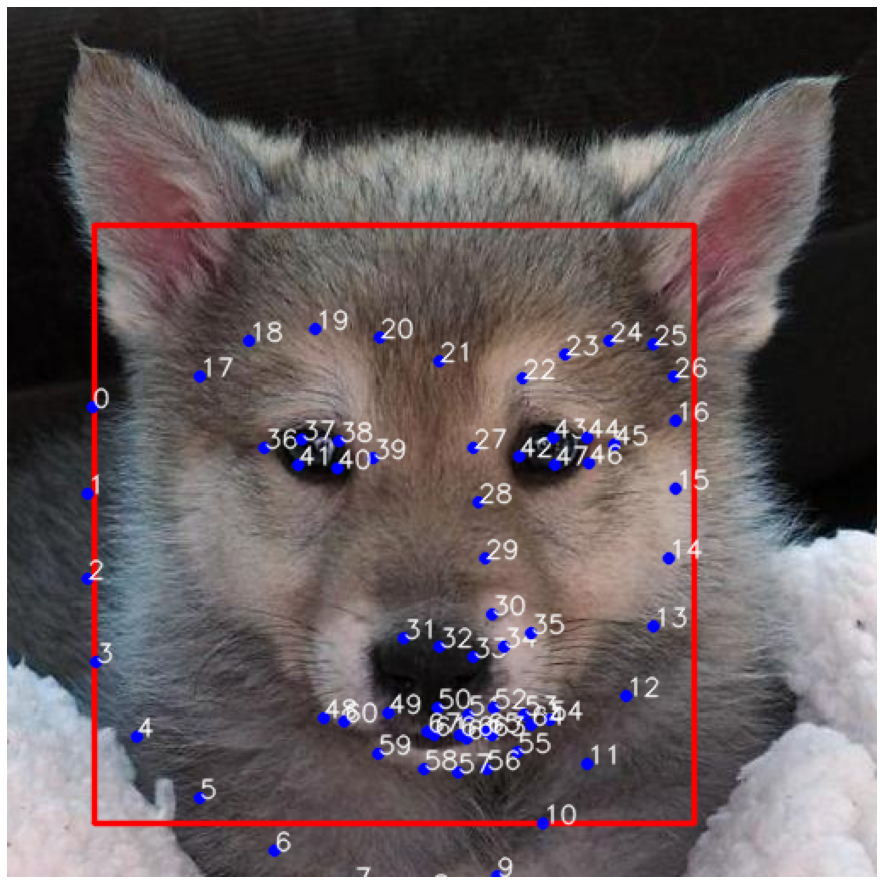

In [55]:
detector = dlib.cnn_face_detection_model_v1('dogHeadDetector.dat')
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks_GTX.dat')

img = cv2.imread('./dog/flickr_dog_000005.jpg')

if img is None:
    print('image read failed')
    sys.exit()
    
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
dets = detector(img, upsample_num_times = 1)

img_result = img.copy()

for i, d in enumerate(dets):
    print('Detection {}: Left: {}, Top: {}, Right: {}, Bottom: {}, Confidence: {}'.format(
    i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))
    
    x1, y1 = d.rect.left(), d.rect.top()
    x2, y2 = d.rect.right(), d.rect.bottom()         # 얼굴 좌표 저장
    
    cv2.rectangle(img_result, (x1, y1), (x2, y2), (255, 0, 0), 2, cv2.LINE_AA)
    
shapes = []

for i, d in enumerate(dets):
    shape = predictor(img, d.rect)
    shape = face_utils.shape_to_np(shape)
    
    for i, p in enumerate(shape):
        shapes.append(shape)
        cv2.circle(img_result, tuple(p), 3, (0, 0, 255), -1, cv2.LINE_AA)
        cv2.putText(img_result, str(i), tuple(p), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                   (255, 255, 255), 1, cv2.LINE_AA)
        
img_out = cv2.cvtColor(img_result, cv2.COLOR_RGB2BGR)

plt.figure(figsize = (16, 16)), plt.axis('off')
plt.imshow(img_result)

# cv2.imshow('image', img_result)

# cv2.waitKey()
# cv2.destroyAllWindows()